In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
              names=["symboling","normalized_losses","make","fuel_type","aspiration","num_of_doors",
                     "body_style","drive_wheels","engine_location","wheel_base","length","width","height",
                     "curb_weight","engine_type","num_of_cylinders","engine_size","fuel_system","bore",
                     "stroke","compression_ratio","horsepower","peak_rpm","city_mpg","highway_mpg","price"])

In [5]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [6]:
df.describe

<bound method NDFrame.describe of      symboling normalized_losses         make fuel_type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0            two  convertible          rwd    

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

# Find the number of records which are noise free

In [8]:
noise_free=df[(df=="?").sum(axis=1)==0]

In [9]:
noise_free

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Clean data after removing noise

In [10]:
df_data=df.replace('?',np.nan)
df_data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [11]:
df.duplicated().sum()

0

# Fill missing data of normalized_losses, price, horsepower, peak_rpm, bore, stroke with the respective column mean
# Fill missing data category Number of doors with the mode of the column 

In [12]:
#filling the data of normalized_losses
df_temp=df[df["normalized_losses"]!="?"]
normalized_mean=df_temp["normalized_losses"].astype(float).mean()
df["normalized_losses"]=df["normalized_losses"].replace("?",normalized_mean).astype(float)

In [13]:
#filling the data of price
df_temp=df[df["price"]!="?"]
price_mean=df_temp["price"].astype(float).mean()
df["price"]=df["price"].replace("?",price_mean).astype(float)
#filling the data of horsepower
df_temp=df[df["horsepower"]!="?"]
horsepower_mean=df_temp["horsepower"].astype(float).mean()
df["horsepower"]=df["horsepower"].replace("?",horsepower_mean).astype(float)
#filling the data of bore
df_temp=df[df["bore"]!="?"]
bore_mean=df_temp["bore"].astype(float).mean()
df["bore"]=df["bore"].replace("?",bore_mean).astype(float)
#filling the data of peak_rpm
df_temp=df[df["peak_rpm"]!="?"]
peak_mean=df_temp["peak_rpm"].astype(float).mean()
df["peak_rpm"]=df["peak_rpm"].replace("?",peak_mean)
#filling the data of stroke
df_temp=df[df["stroke"]!="?"]
stroke_mean=df_temp["stroke"].astype(float).mean()
df["stroke"]=df["stroke"].replace("?",stroke_mean)
#filling the data of no_of_doors
df_temp=df[df["num_of_doors"]!="?"]
doors=df_temp["num_of_doors"].mode()
df["num_of_doors"]=df["num_of_doors"].replace("?",doors.iloc[0])

In [14]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0


In [15]:
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,compression_ratio,horsepower,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,10.142537,104.256158,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,3.972040,39.519211,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,7.000000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,8.600000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,9.000000,95.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,9.400000,116.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,23.000000,288.000000,49.000000,54.000000,45400.000000


In [16]:
(df=="?").sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

# Normalize quantitative features in range of [0,1]


In [17]:
quan=pd.DataFrame(data=df,columns=df.mean().index)

In [18]:
quan

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,9.0,111.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,9.0,154.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,10.0,102.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,8.0,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,9.5,114.0,23,28,16845.0
201,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,8.7,160.0,19,25,19045.0
202,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,8.8,134.0,18,23,21485.0
203,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,23.0,106.0,26,27,22470.0


In [19]:
q_min=quan.min()

In [20]:
q_max=quan.max()

In [21]:
q_max

symboling                3.00
normalized_losses      256.00
wheel_base             120.90
length                 208.10
width                   72.30
height                  59.80
curb_weight           4066.00
engine_size            326.00
bore                     3.94
compression_ratio       23.00
horsepower             288.00
city_mpg                49.00
highway_mpg             54.00
price                45400.00
dtype: float64

In [22]:
norm=(quan-q_min)/(q_max-q_min)

In [23]:
norm

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.12500,0.262500,0.222222,0.289474,0.207959
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.12500,0.262500,0.222222,0.289474,0.282558
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.12500,0.441667,0.166667,0.263158,0.282558
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.18750,0.225000,0.305556,0.368421,0.219254
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.06250,0.279167,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.157068,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.15625,0.275000,0.277778,0.315789,0.291123
201,0.2,0.157068,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.10625,0.466667,0.166667,0.236842,0.345738
202,0.2,0.157068,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.11250,0.358333,0.138889,0.184211,0.406311
203,0.2,0.157068,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,1.00000,0.241667,0.361111,0.289474,0.430763


#  Compare frequency distribution for any two columns by plotting histograms for any two columns in the same plot

In [24]:
bins=[47,52,57,62,67,72,77]

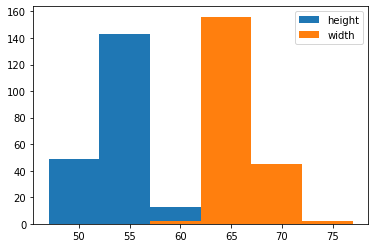

In [25]:
plt.hist(df["height"], bins, alpha=1, label='height')
plt.hist(df["width"], bins, alpha=1, label='width')
plt.legend(loc='best')
plt.show()

# Find the most popular car and draw appropriate plot to justify your answer


In [26]:
pop=df["make"].value_counts()

In [27]:
pop[pop==pop.max()].index[0]

'toyota'

In [28]:
print("Most popular car is",pop[pop==pop.max()].index[0].upper())

Most popular car is TOYOTA


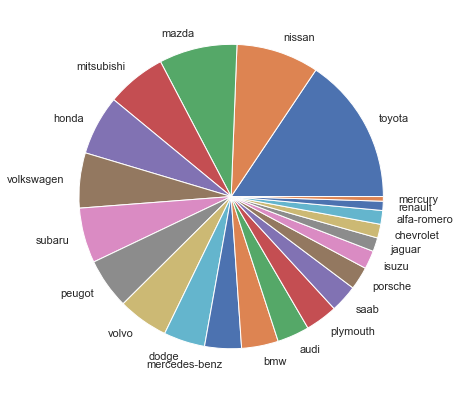

In [91]:
plt.fig_size=(30,30)
plt.pie(pop,labels=pop.index);
plt.show();

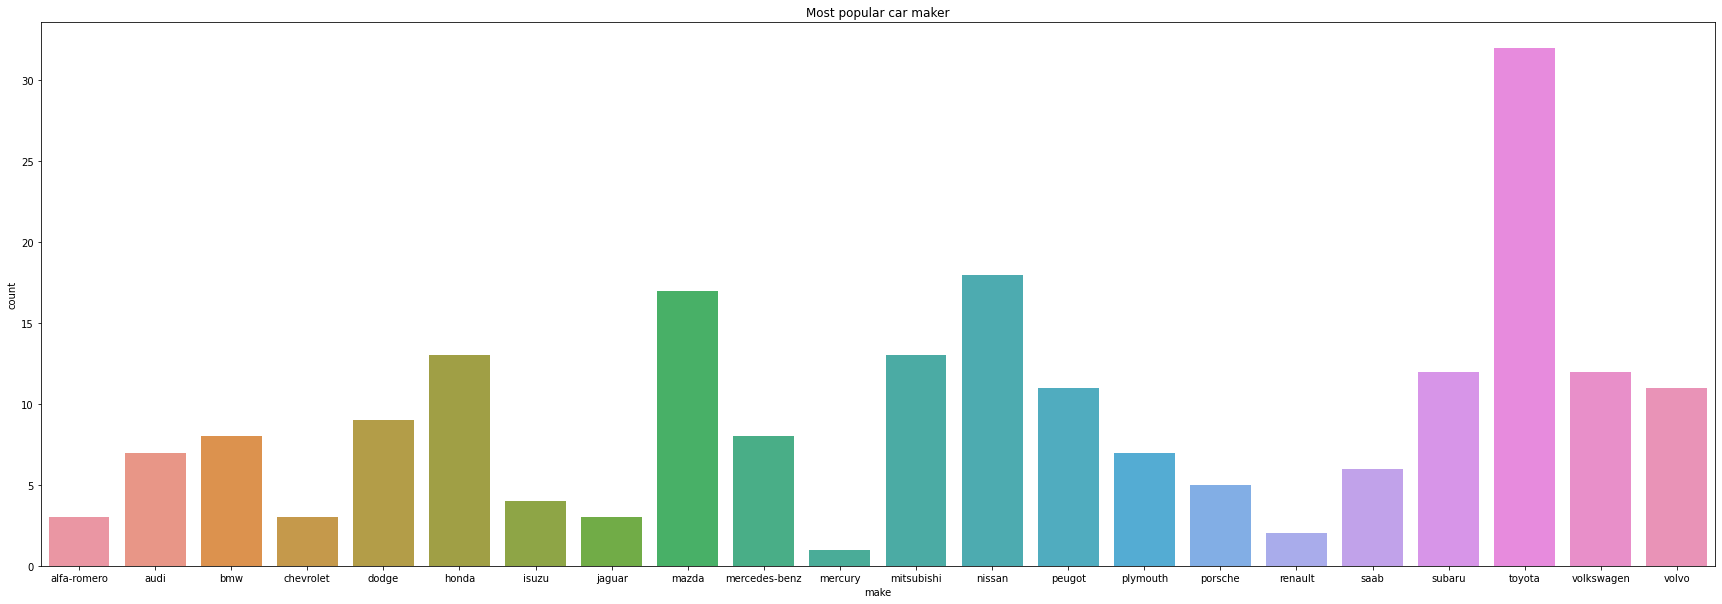

In [30]:
plt.figure(figsize=(30,10))
plt.title('Most popular car maker')
sns.countplot(x = df['make'], data = df)
plt.show()

# Toyota is most popular

# Plot barchart to compare capacity of any two cars alongwith their cost


In [31]:
audi=df[df["make"]=="audi"]

In [32]:
data=audi[["engine_size","horsepower","price"]].mean()

In [33]:
data

engine_size      130.714286
horsepower       121.000000
price          17194.589908
dtype: float64

In [34]:
volvo=df[df["make"]=="volvo"]

In [35]:
data1=volvo[["engine_size","horsepower","price"]].mean()

In [36]:
data

engine_size      130.714286
horsepower       121.000000
price          17194.589908
dtype: float64

In [37]:
data1

engine_size      142.272727
horsepower       128.000000
price          18063.181818
dtype: float64

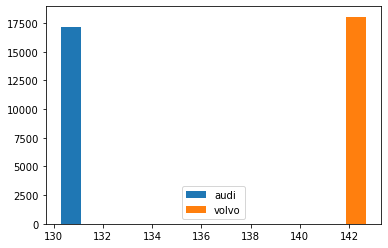

In [38]:
plt.bar(x=data["engine_size"],height=data["price"],label="audi")
plt.bar(x=data1["engine_size"],height=data1["price"],label="volvo")
plt.legend();

<Figure size 2160x720 with 0 Axes>

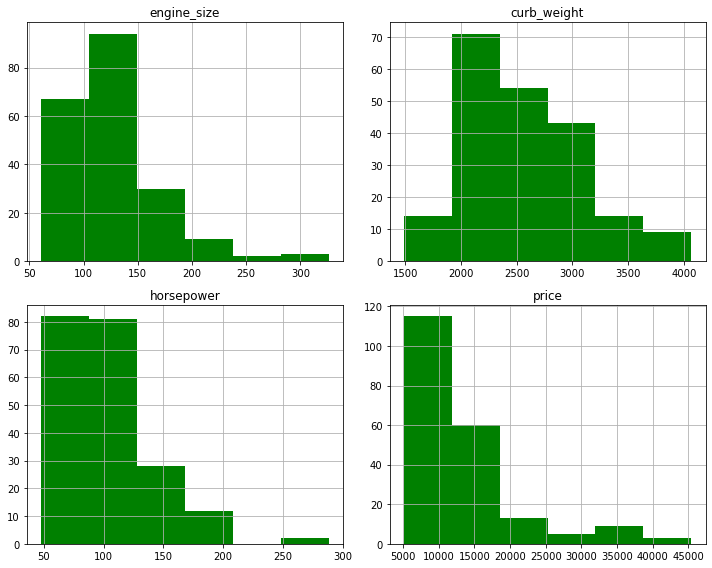

In [39]:
plt.figure(figsize=(30,10))
df[['engine_size','peak_rpm','curb_weight','horsepower','price']].hist(figsize=(10,8),bins=6,color='g')
plt.tight_layout()
plt.show()

# Engine Size mostly is in range 60 to 190

# Most of the cars Curb Weight is in range 1900 to 3100

# Most of the cars horsepower is in range of 50 to 125

# Most cars price is in range of 5000 to 18000

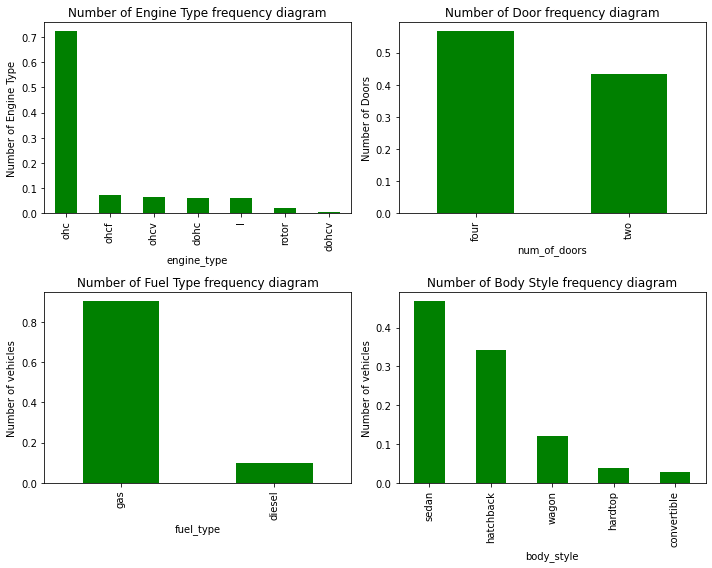

In [40]:
plt.figure(1)
plt.subplot(221)
df['engine_type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='g')
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type')
plt.xlabel('engine_type');


plt.subplot(222)
df['num_of_doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='g')
plt.title("Number of Door frequency diagram")
plt.ylabel('Number of Doors')
plt.xlabel('num_of_doors');

plt.subplot(223)
df['fuel_type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='g')
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel_type');

plt.subplot(224)
df['body_style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='g')
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('body_style');
plt.tight_layout()
plt.show()

# More than 70 % of the vehicle has Ohc type of Engine
# More than 50% of the cars has 4 doors
# More than 85% of the vehicles
# More than 40% cars are of sedan body_style and around 30% of cars are of hatchback body_style


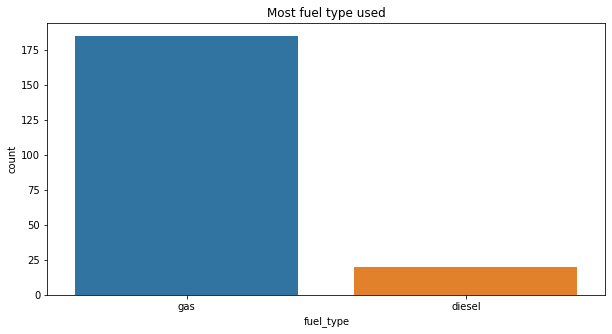

In [41]:
plt.figure(figsize=(10,5))
plt.title('Most fuel type used')
sns.countplot(x =df['fuel_type'], data = df);

# Gas is the most used fuel 

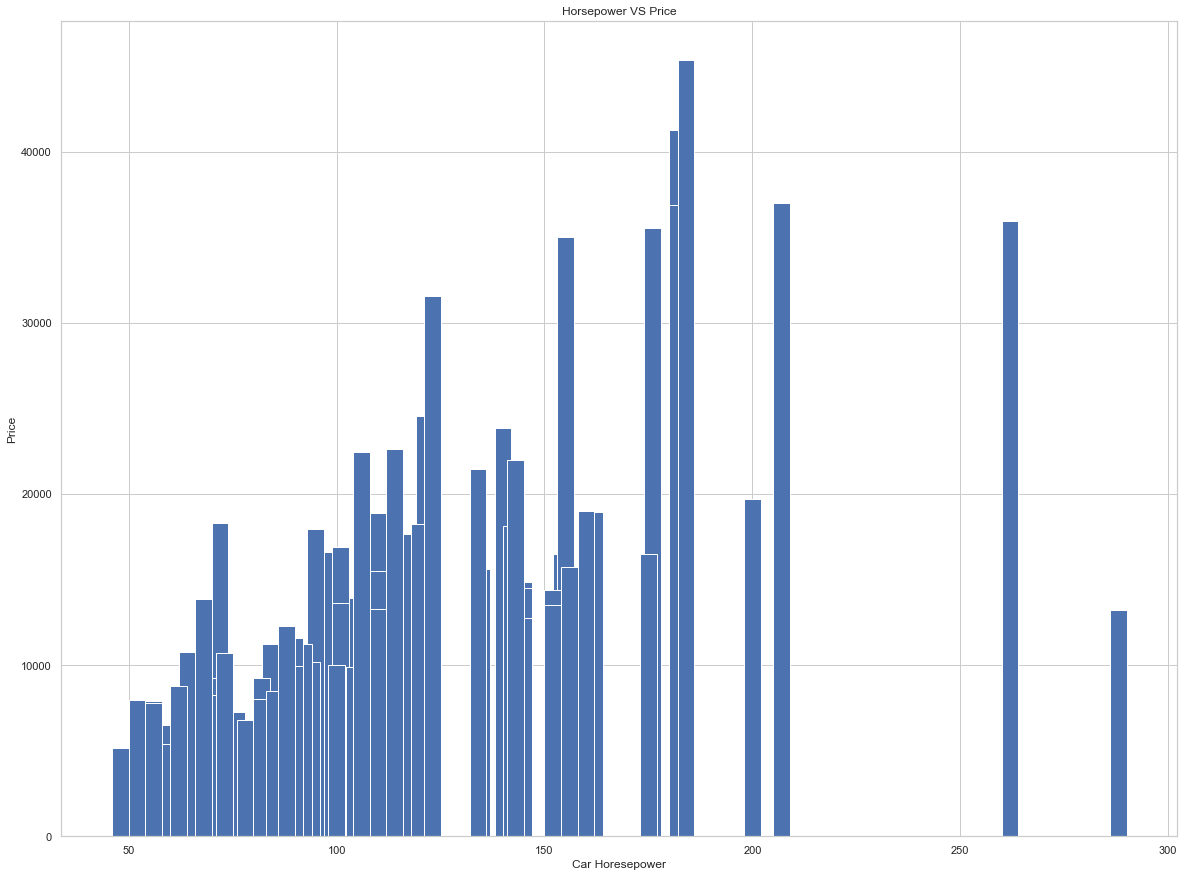

In [78]:
plt.figure(figsize=(20, 15))
plt.bar(df["horsepower"],df["price"],width=4);
plt.title('Horsepower VS Price')
plt.xlabel('Car Horesepower')
plt.ylabel('Price')
plt.show()

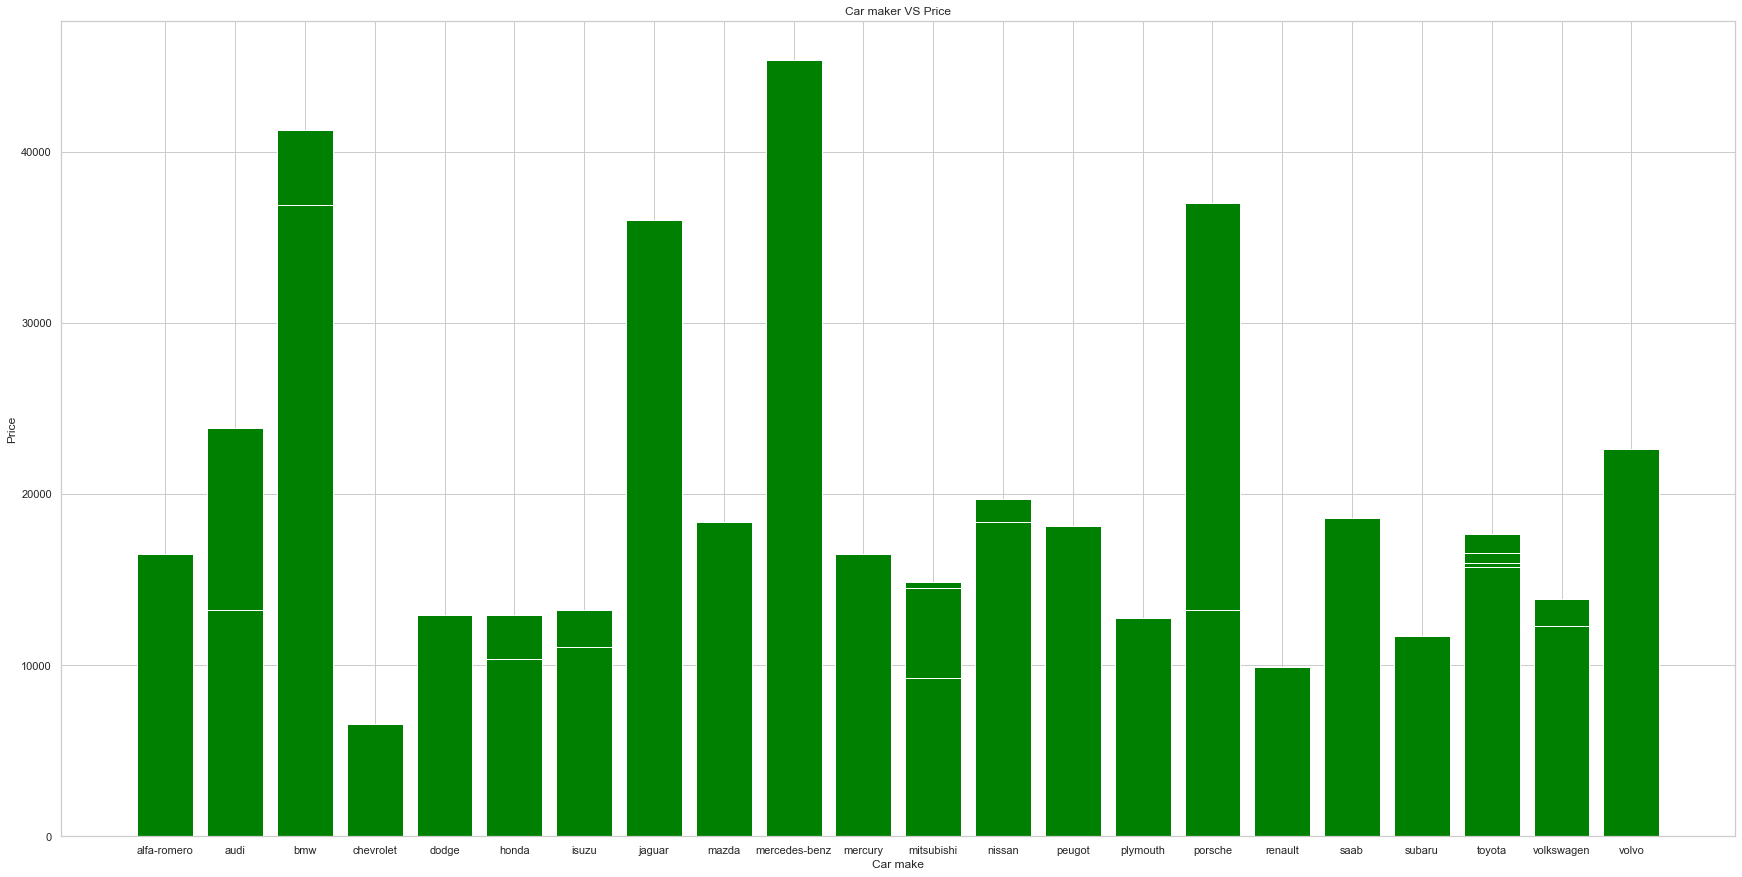

In [92]:
plt.figure(figsize=(30, 15))
plt.bar(df["make"],df["price"], color = 'green');
plt.title('Car maker VS Price')
plt.xlabel('Car make')
plt.ylabel('Price')
plt.show()

# Mercedes-benz is most expensive car and bmw is second most expensive car

<AxesSubplot:title={'center':'Car Price'}, xlabel='price'>

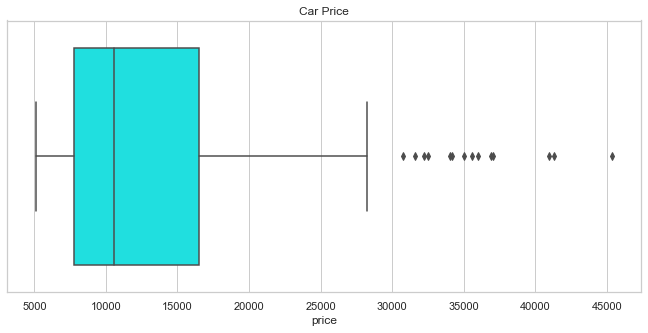

In [84]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.title("Car Price")
sns.boxplot(df["price"],color = 'cyan')

# Average Cost price of car is 10000

In [44]:
df.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,compression_ratio,horsepower,city_mpg,highway_mpg,price
symboling,1.000000,0.465190,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130083,-0.178515,0.071389,-0.035823,0.034606,-0.082201
normalized_losses,0.465190,1.000000,-0.056518,0.019209,0.084195,-0.370706,0.097785,0.110997,-0.029266,-0.114525,0.203434,-0.218749,-0.178221,0.133999
wheel_base,-0.531954,-0.056518,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488760,0.249786,0.351957,-0.470414,-0.544082,0.583168
length,-0.357612,0.019209,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606462,0.158414,0.554434,-0.670909,-0.704662,0.682986
width,-0.232919,0.084195,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559152,0.181129,0.642195,-0.642704,-0.677218,0.728699
height,-0.541038,-0.370706,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171101,0.261214,-0.110137,-0.048640,-0.107358,0.134388
curb_weight,-0.227691,0.097785,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648485,0.151362,0.750968,-0.757414,-0.797465,0.820825
engine_size,-0.105790,0.110997,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583798,0.028971,0.810713,-0.653658,-0.677470,0.861752
bore,-0.130083,-0.029266,0.488760,0.606462,0.559152,0.171101,0.648485,0.583798,1.000000,0.005201,0.575737,-0.584508,-0.586992,0.532300
compression_ratio,-0.178515,-0.114525,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005201,1.000000,-0.205740,0.324701,0.265201,0.070990


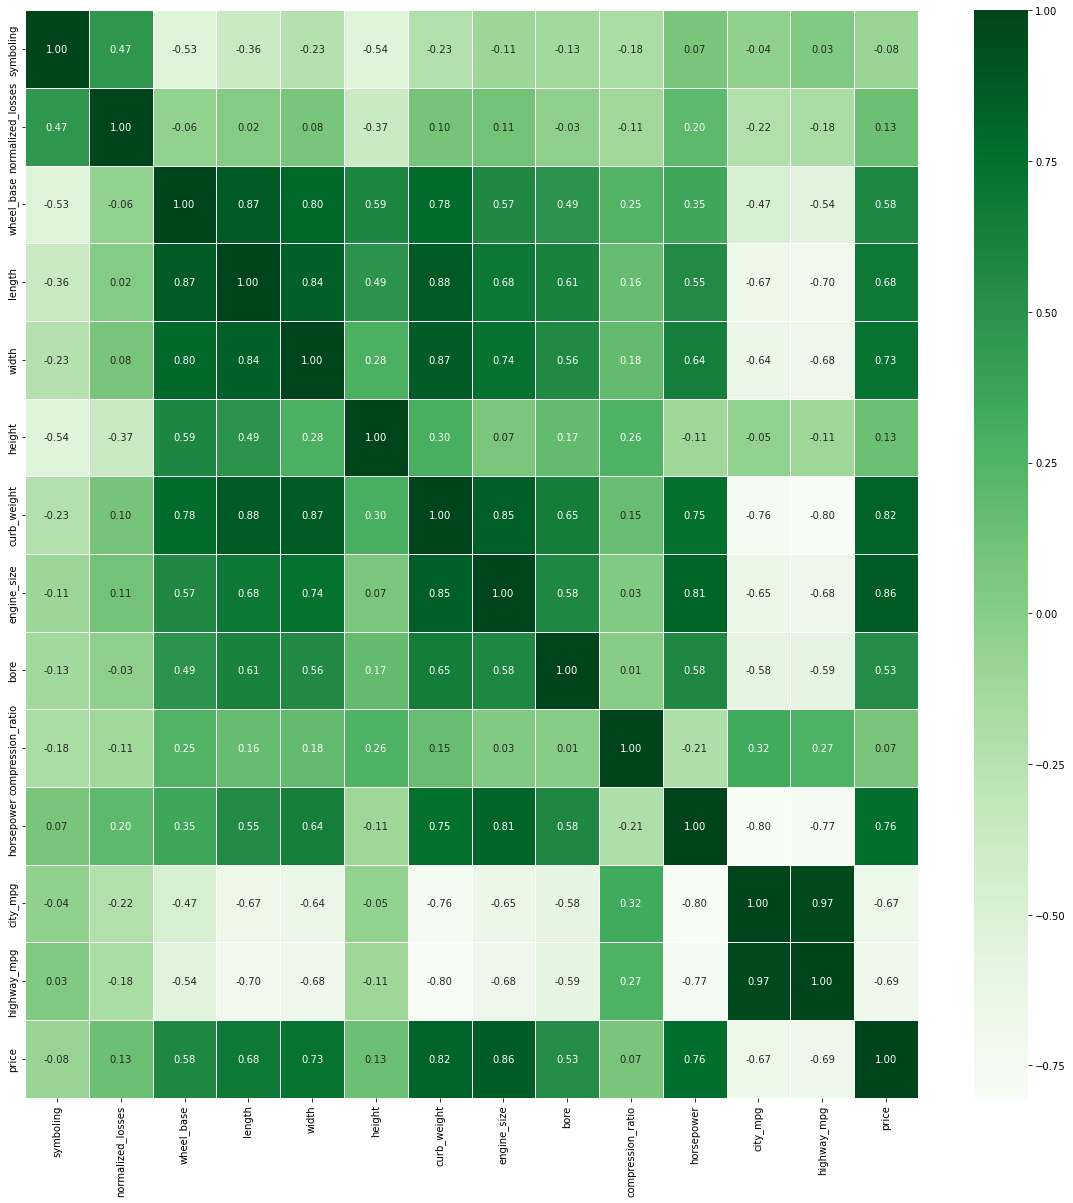

In [45]:
corr = df.corr()
plt.figure(figsize=(20,20))
s = sns.heatmap(corr, annot=True, fmt='.2f',cmap="Greens",linewidths=.6)

# engine_size and horsepower are positively correlated
# curb_weight and horsepower are positviely correalated
# city_mpg, highway_mpg are negatively correlated
# price and engine size are positively correlated
# engine_size and curb_weight are positively correalted with price
# city-mpg is negatively corelated with price 
# horsepower and city_mpg are negatively correlated

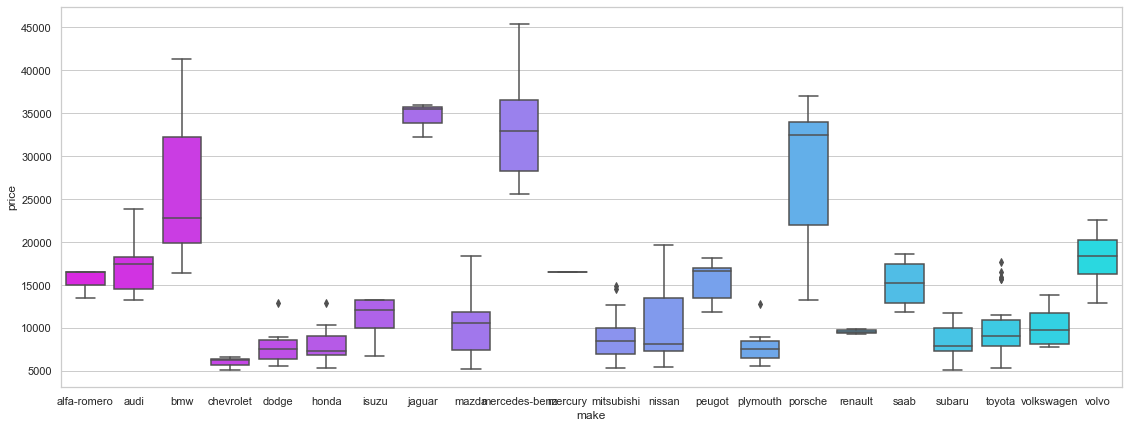

In [49]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="make", y="price", data=df, palette="cool_r")

# Mercedez_Benz ,BMW, Jaguar, Porshe produces expensive cars where price range is more than 20000

# cheverolet,dodge, honda,mitbushi, nissan,plymouth subaru,toyata produce comparetively lower price cars where price range is below 20000


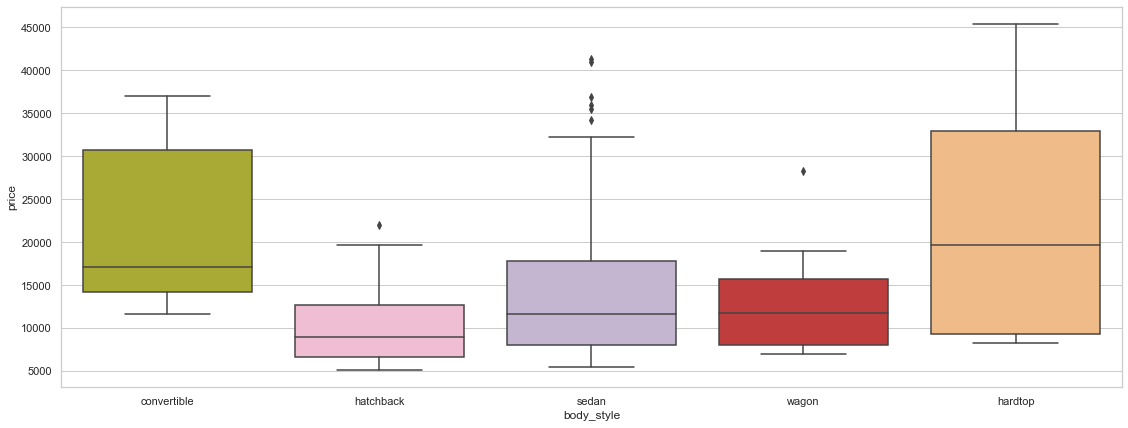

In [85]:
ax = sns.boxplot(x="body_style", y="price", data=df,palette="tab20_r" )

# Hardtop models are expensive followed by convertible body style

# hatchback, sedan and wagon models are in price range of below 20000

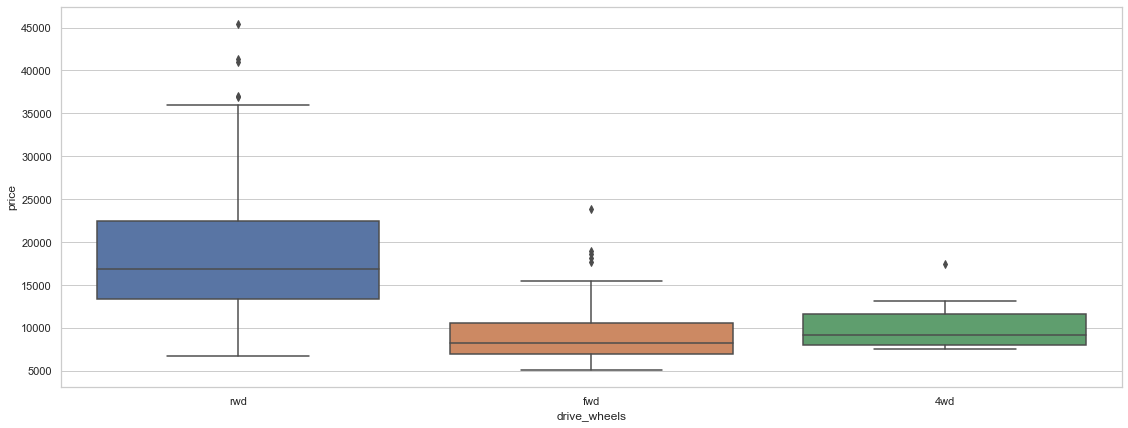

In [51]:
ax = sns.boxplot(x="drive_wheels", y="price", data=df)

# The average price for a rear wheel drive is 1800 while the average of the four wheel drive is 800
# rwd wheel drive vehicle are expensive

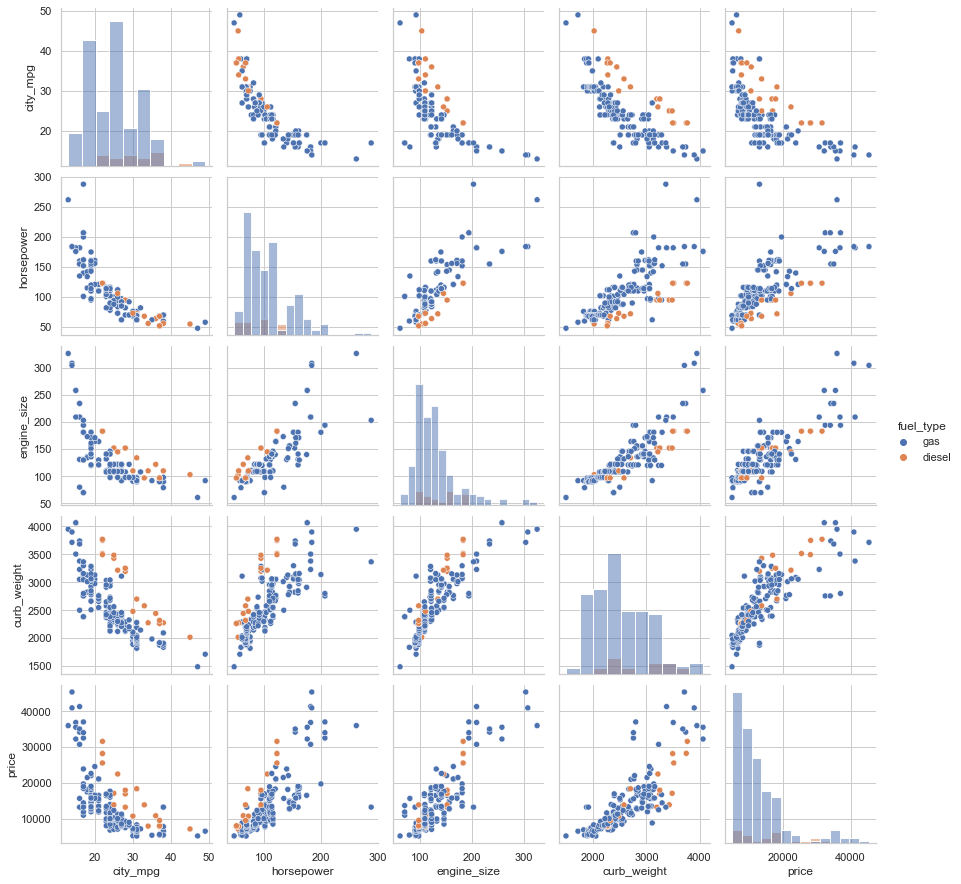

In [52]:
sns.pairplot(df[["city_mpg", "horsepower", "engine_size", "curb_weight","price", "fuel_type"]], hue="fuel_type", diag_kind="hist")

# Vehicle Mileage decrease as increase in Horsepower , engine_size, Curb_weight
# As horsepower increase the engine size increases
# Curbweight increases with the increase in Engine Size

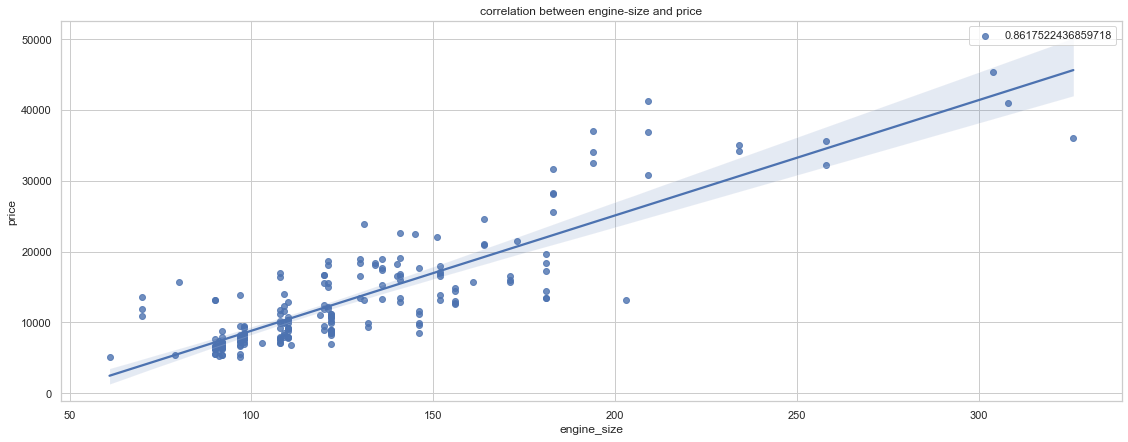

In [53]:
sns.regplot(x = 'engine_size', y = 'price', data = df,label=df["engine_size"].corr(df["price"]))
plt.title("Correlation between engine_size and price")
plt.legend()
plt.show()

# As the engine_size goes up, the price goes up, this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the line is almost a perfect diagonal line and the correlation between engine_size and price is 0.862

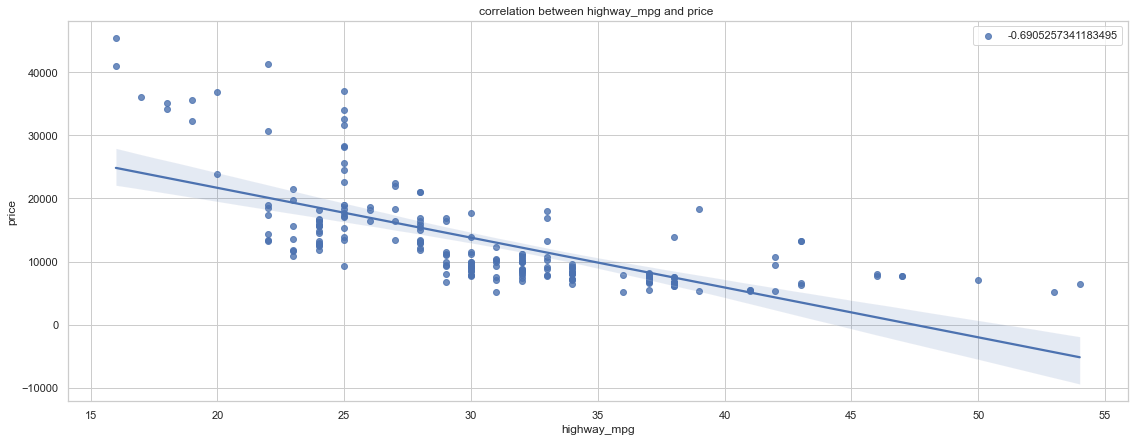

In [54]:
sns.regplot(x='highway_mpg', y='price',data=df,label=df["highway_mpg"].corr(df["price"]))
plt.title('correlation between highway_mpg and price ')
plt.legend()
plt.show()

# As the highway_mpg goes up, the price goes down, this indicates a negative relationship between the two variables. highway_mpg could potentially be a predictor of price as the correlation between highway_mpg and price is -0.691

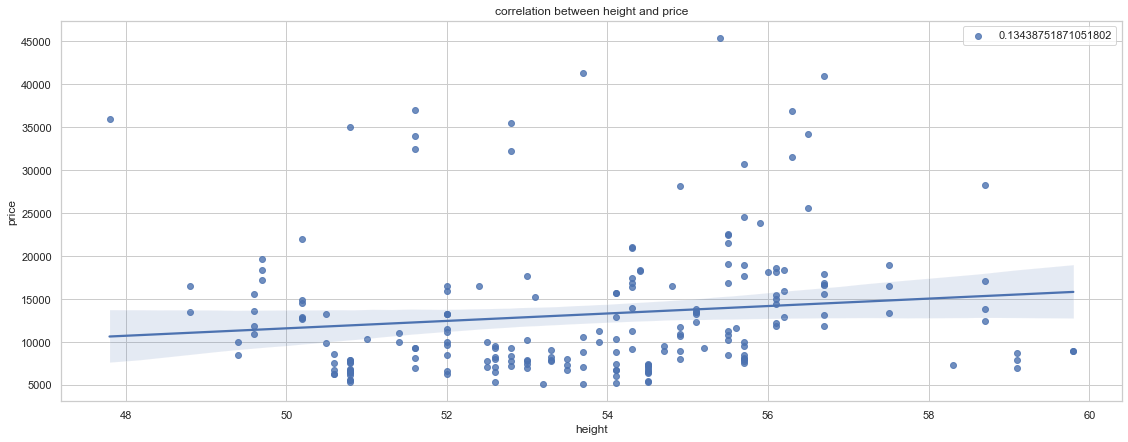

In [55]:
sns.regplot(x='height', y='price', data=df, label=df["height"].corr(df["price"]))
plt.title('correlation between height and price')
plt.legend()
plt.show()

# height does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it is not a reliable variable as the correlation between height and price is 0.134



# Draw word cloud for car names and export to a file

In [88]:
df["make"].to_csv("model",index=False)

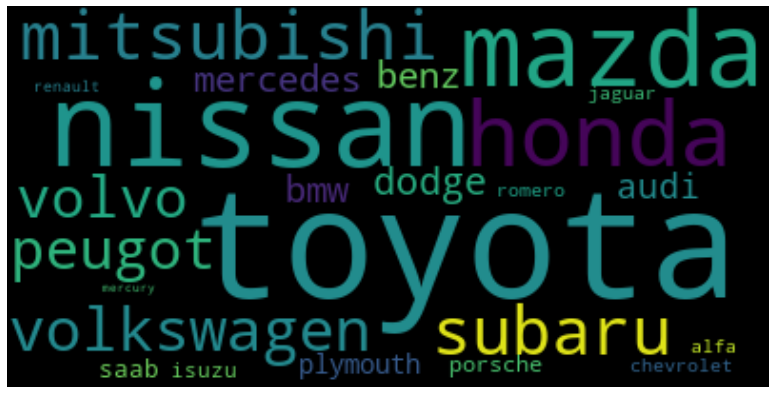

In [89]:
from wordcloud import WordCloud,STOPWORDS
data=pd.read_csv("model")
#df.isna().sum()
text = " ".join(cat.split()[0] for cat in data["make"].values)
word_cloud = WordCloud(collocations = False, background_color = 'black').generate(text)
#plt.imshow(word_cloud)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
word_cloud.to_file("cars_model.png");

In [90]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
#dataset = open("SampleWords.rtf", "r").read()
dataset = open("model", "r").read()
def create_word_cloud(string):
   maskArray = np.array(Image.open("cloud.jpg"))
   cloud = WordCloud(background_color = "black", max_words = 200, mask = maskArray, stopwords = set(STOPWORDS))
   cloud.generate(string)
   cloud.to_file("CARS.png")

dataset = dataset.lower()
create_word_cloud(dataset)